## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes = True)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as statm

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

## Reading the data as a data frame

In [2]:
concrete = pd.read_csv("concrete.csv")
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
concrete.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


## Data Analysis

### Shape of the data

In [4]:
concrete.shape

(1030, 9)

In [5]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Summary Statistics

In [6]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Observation:**

- Compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier

- circularity : it also seems to be normally distribted as mean amd median has similar values

- scatter_ratio feature seems to be having some kind of skewness and outlier


### Checking missing values (Data Cleaning)

In [7]:
concrete.isna().apply(pd.value_counts) # checking missing value

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


**Observations:**

- The dataset consists of 1030 instances with 9 attributes and has no missing values.

- There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (MPa - Mega Pascal).


## Understanding the relationship between independent attributes:

### Cement

In [8]:
print('Range of values: ', concrete['cement'].max()-concrete['cement'].min()) #Range of values observed

Range of values:  438.0


#### Central values

In [9]:
print('Minimum age: ', concrete['cement'].min())
print('Maximum age: ',concrete['cement'].max())
print('Mean value: ', concrete['cement'].mean())
print('Median value: ',concrete['cement'].median())
print('Standard deviation: ', concrete['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


#### Quartiles

In [10]:
Q1=concrete['cement'].quantile(q=0.25)
Q3=concrete['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


#### Outlier detection from Interquartile range (IQR) in original data

In [11]:
#IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [12]:
print('Number of outliers in cement upper : ', concrete[concrete['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete[concrete['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete[concrete['cement']>586.4375]['cement'].count()*100/len(concrete)), '%')
print('% of Outlier in cement lower: ',round(concrete[concrete['cement']<-44.0625]['cement'].count()*100/len(concrete)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


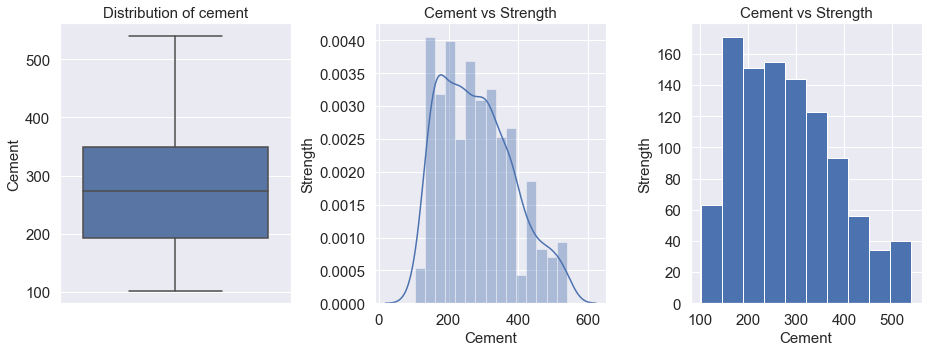

In [13]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Age

In [14]:
print('Range of values: ', concrete['age'].max()-concrete['age'].min())

Range of values:  364


#### Central values

In [15]:
print('Minimum age: ', concrete['age'].min())
print('Maximum age: ',concrete['age'].max())
print('Mean value: ', concrete['age'].mean())
print('Median value: ',concrete['age'].median())
print('Standard deviation: ', concrete['age'].std())
print('Null values: ',concrete['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


#### Quartiles

In [16]:
Q1=concrete['age'].quantile(q=0.25)
Q3=concrete['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


#### Outlier detection from Interquartile range (IQR)  in original data

In [17]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [18]:
print('Number of outliers in age upper : ', concrete[concrete['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete[concrete['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete[concrete['age']>129.5]['age'].count()*100/len(concrete)), '%')
print('% of Outlier in age lower: ',round(concrete[concrete['age']<-66.5]['age'].count()*100/len(concrete)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


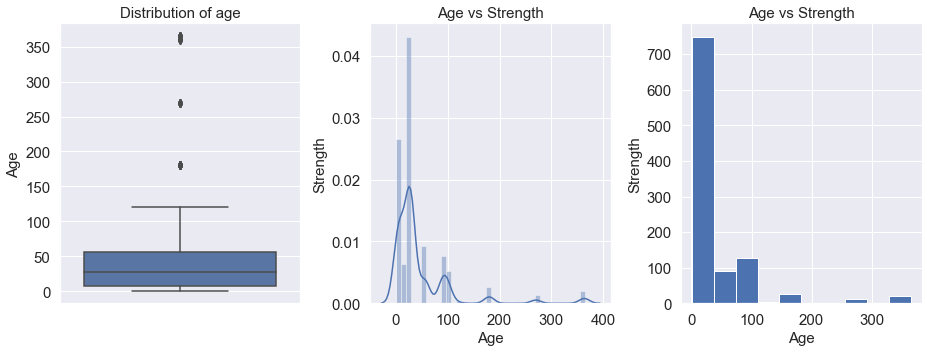

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

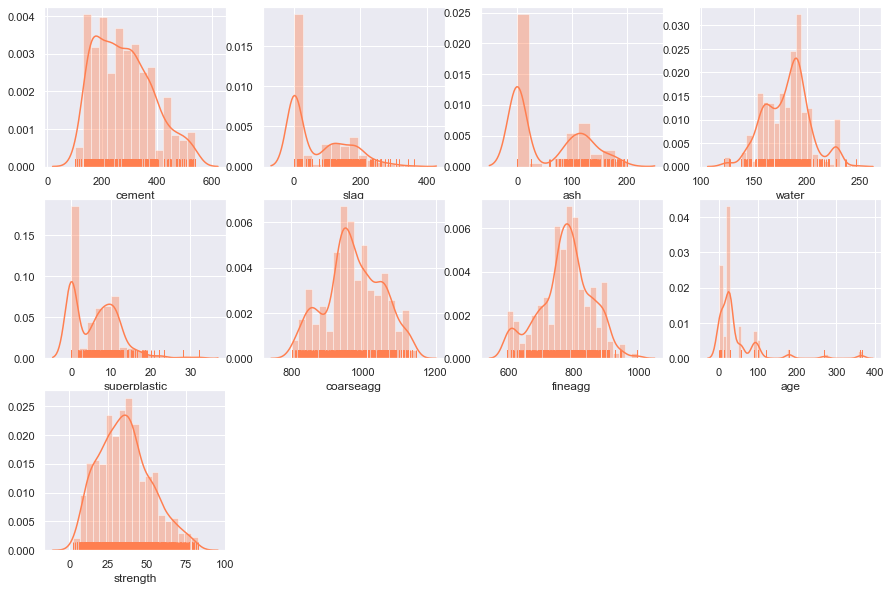

In [20]:
plt.figure(figsize = (15,10))

plt.subplot(3,4,1)
sns.distplot(concrete['cement'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,2)
sns.distplot(concrete['slag'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,3)
sns.distplot(concrete['ash'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,4)
sns.distplot(concrete['water'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,5)
sns.distplot(concrete['superplastic'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,6)
sns.distplot(concrete['coarseagg'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,7)
sns.distplot(concrete['fineagg'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,8)
sns.distplot(concrete['age'], kde = True, rug = True, color = "coral")

plt.subplot(3,4,9)
sns.distplot(concrete['strength'], kde = True, rug = True, color = "coral")

plt.show()

**Observations:**
- cement is almost normal. 
- slag has  three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

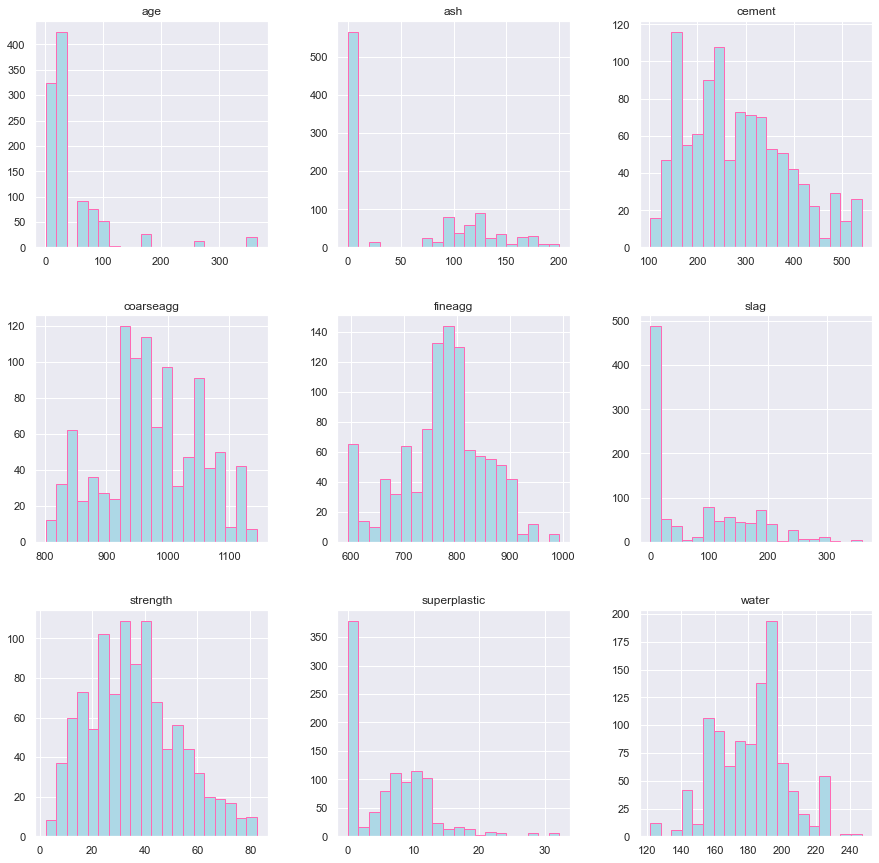

In [21]:

concrete.hist(bins=20, figsize=(15,15), color='lightblue', edgecolor = 'hotpink')
plt.show()

It is also giving the same information like distance plot.

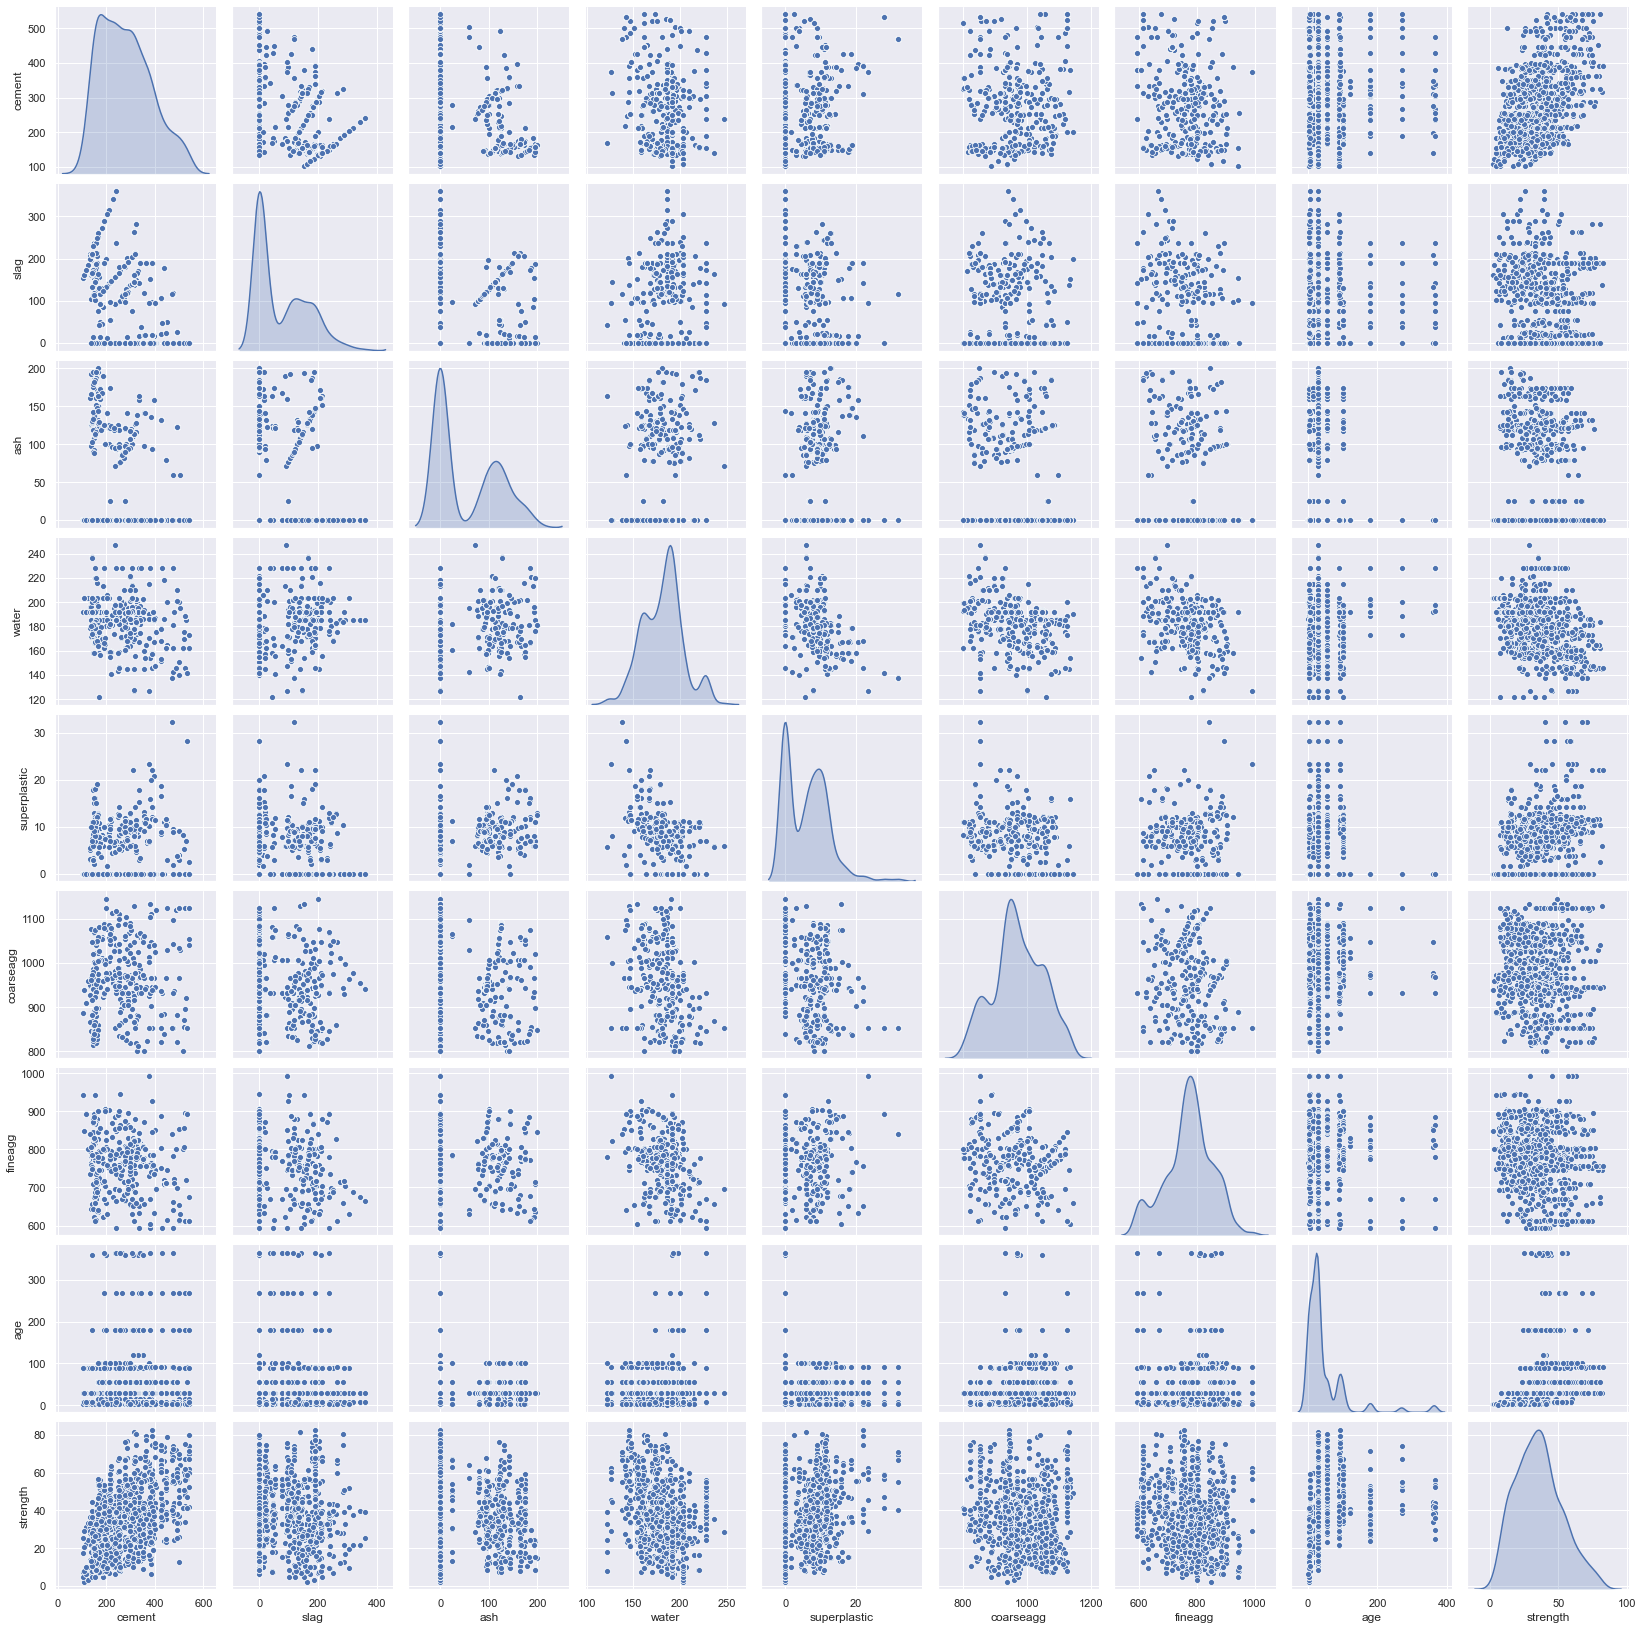

In [22]:
#The pair plot gives a visual representation of correlations between all the features.
sns.pairplot(concrete, diag_kind='kde')  

#### Diagonals Analysis
- The diagonal gives the same information, we got using distplot.
- cement attribute have almost normal curve.
- slag has  two gausssians and rightly skewed.It shows the presence of outlies.
- ash has two gaussians and rightly skewed.It shows the presence of outlies.
- water has atleast guassians and slighly left skewed.It shows the presence of outlies.
- superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed. It shows the presence of outlies.
- strength is close to a normal curve.

We not only have missing values problem but also outliers problem in the dataset.

#### Off Diagonal Analysis: Relationship between indpendent attributes
##### Scatter plots
- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true  as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

#### strength attribute : Relationship between dependent and independent attributes
- strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs slag: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [23]:
#corrlation matrix 
corr = concrete.corr() 
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


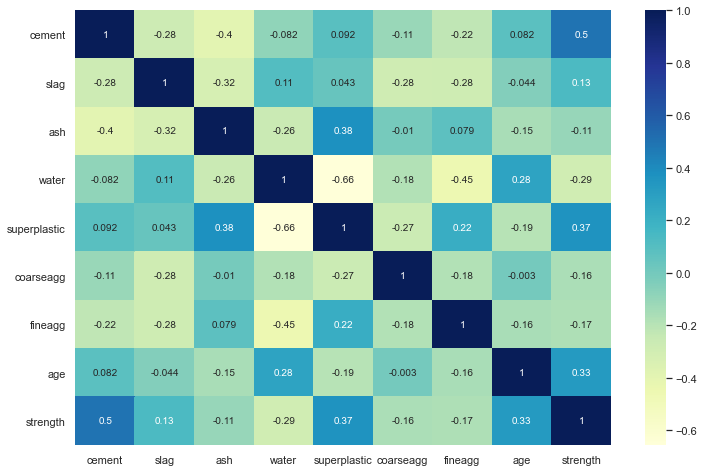

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap = "YlGnBu")
plt.show()

**Observations:**

- We can observe a high positive correlation between compressive Strength (CC_Strength) and Cement. This is true because strength concrete indeed increases with an increase in the amount of cement used in preparing it. Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.

- A strong negative correlation between Super Plasticizer and Water.

- Positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate.

### We can plot scatter plots between Strength and other features to see more complex relations.

Text(0.5, 1.0, 'Compressive Strength Distribution')

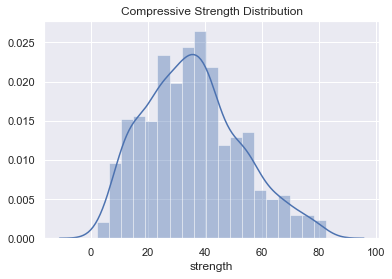

In [25]:
ax = sns.distplot(concrete.strength)
ax.set_title("Compressive Strength Distribution")

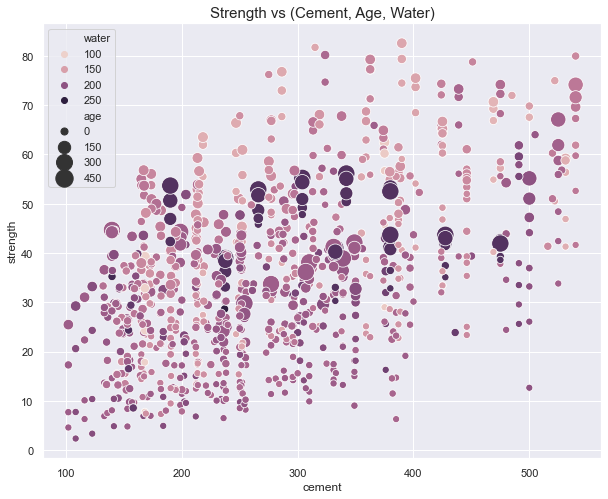

In [26]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=concrete, ax=ax, sizes=(50, 300))
plt.title("Strength vs (Cement, Age, Water)", fontsize= 15)
plt.show()

**Observation:**
- Compressive strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis.
- Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.
- Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.
- The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
- Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

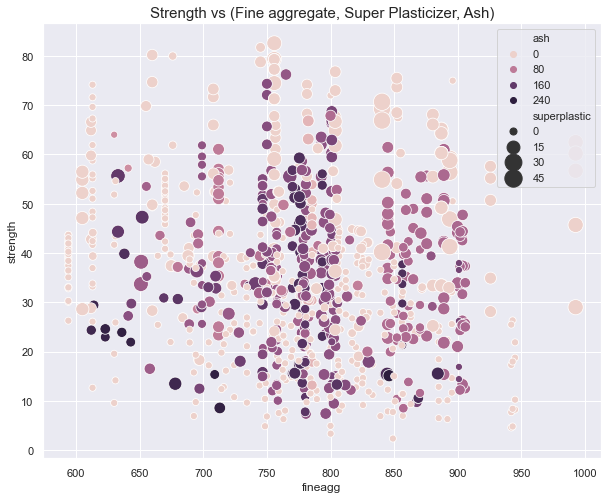

In [27]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="strength", x="fineagg", hue="ash",size="superplastic", data=concrete, ax=ax, sizes=(50, 300))
plt.title("Strength vs (Fine aggregate, Super Plasticizer, Ash)", fontsize= 15)
plt.show()

**Observations:**
- Compressive strength decreases Fly ash increases, as darker dots are concentrated in the region representing low compressive strength.
- Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.

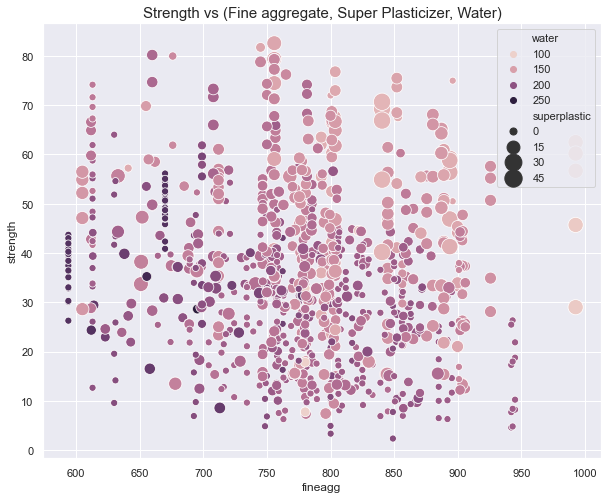

In [28]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="strength", x="fineagg", hue="water",size="superplastic", data=concrete, ax=ax, sizes=(50, 300))
plt.title("Strength vs (Fine aggregate, Super Plasticizer, Water)", fontsize= 15)
plt.show()

**Observations:**
- As Flyash increases the strength decreases
- Strength increases with Super plasticizer

### Visualizing outliers using boxplots

In [29]:
#Creating copy of original dataset
concrete_df = concrete.copy()

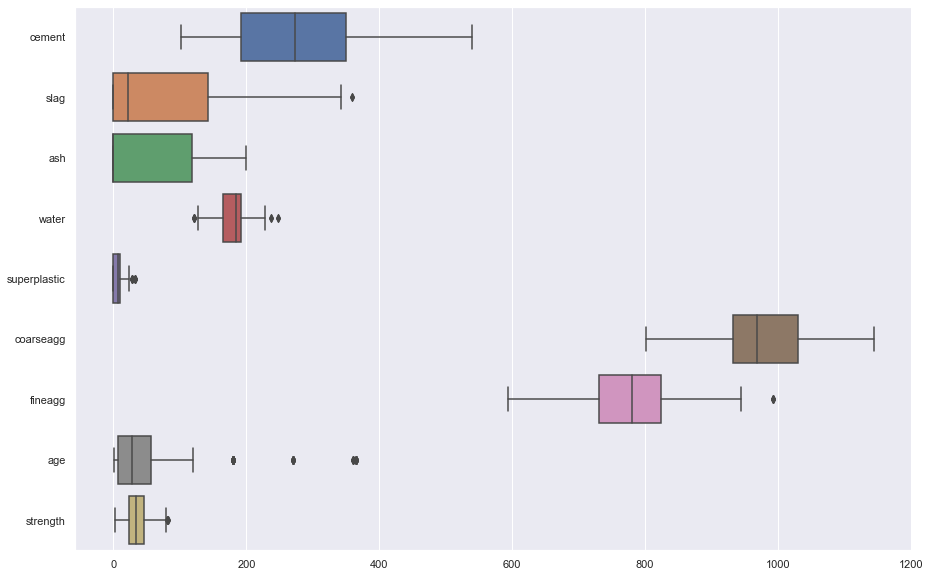

In [30]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(data=concrete_df, orient="h")

It also shows that slag, ash, water superplastic, and age contains outliers.

In [31]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df[((concrete_df.cement - concrete_df.cement.mean()) / concrete_df.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df[((concrete_df.slag - concrete_df.slag.mean()) / concrete_df.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df[((concrete_df.ash - concrete_df.ash.mean()) / concrete_df.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df[((concrete_df.water - concrete_df.water.mean()) / concrete_df.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df[((concrete_df.superplastic - concrete_df.superplastic.mean()) / concrete_df.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df[((concrete_df.coarseagg - concrete_df.coarseagg.mean()) / concrete_df.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df[((concrete_df.fineagg - concrete_df.fineagg.mean()) / concrete_df.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df[((concrete_df.age - concrete_df.age.mean()) / concrete_df.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


- Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
- We can see that slag, water, superplastic and age contain outliers.

In [32]:
#Records which contains the outliers in slag attribute
print('Records containing outliers in slag: \n',concrete_df[((concrete_df.slag - concrete_df.slag.mean()) / concrete_df.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [33]:
#Records which contains the outliers in water attribute
print('Records containing outliers in water: \n',concrete_df[((concrete_df.water - concrete_df.water.mean()) / concrete_df.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [34]:
#Records which contains the outliers in superplastic attribute
print('Records containing outliers in superplastic: \n',concrete_df[((concrete_df.superplastic - concrete_df.superplastic.mean()) / concrete_df.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [35]:
#Records which contains the outliers in age attribute
print('Records containing outliers in age: \n',concrete_df[((concrete_df.age - concrete_df.age.mean()) / concrete_df.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


#### Handling the outliers

In [36]:
#Replacing the outliers by median
for col_name in concrete_df.columns[:-1]:
    q1 = concrete_df[col_name].quantile(0.25)
    q3 = concrete_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df.loc[(concrete_df[col_name] < low) | (concrete_df[col_name] > high), col_name] = concrete_df[col_name].median()

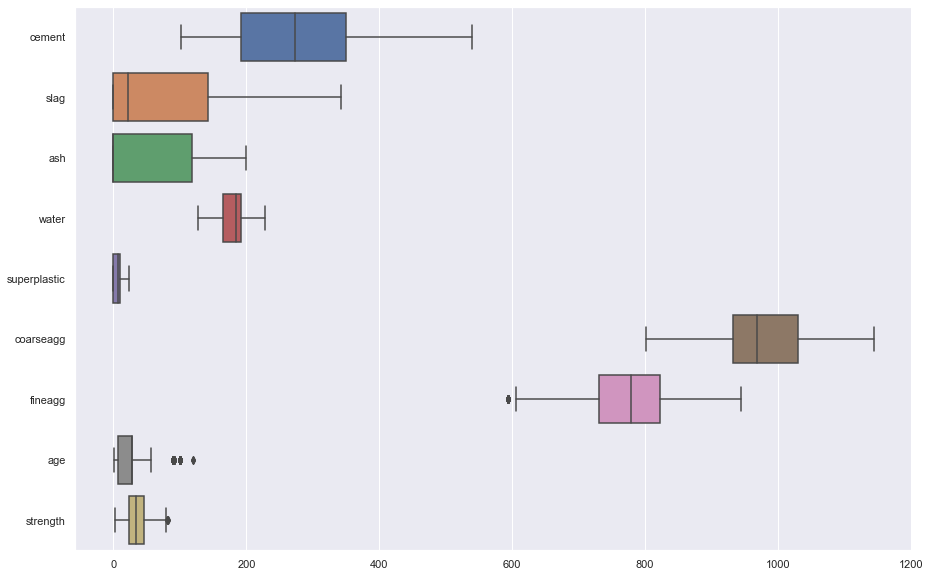

In [37]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(data=concrete_df, orient="h")

# Data Preprocessing

Separating Input Features and Target Variable. 

In [38]:
X = concrete_df.iloc[:,:-1]         # Features - All columns but last
y = concrete_df.iloc[:,-1]          # Target - Last Column

Splitting data into Training and Test splits.


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

#### Linear Regression

- The Go-to method for Regression problems.
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
- The objective function used in this case is Mean Squared Error.
- There are three versions of Linear Regression
  
  1)Linear Regression - No regularisation
  
  2)Lasso Regression - L1 regularisation (Tries to push coefficients to zero)

  3)Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
  
We will compare these three algorithms

In [41]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

**Evaluation**

Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 8.60 		 73.90 		 6.56 		 0.76
LassoRegression 	 9.15 		 83.78 		 7.17 		 0.73
RidgeRegression 	 8.60 		 73.92 		 6.56 		 0.76


*The performance seem to be similar with all the three methods.*

**Plotting the coefficients**

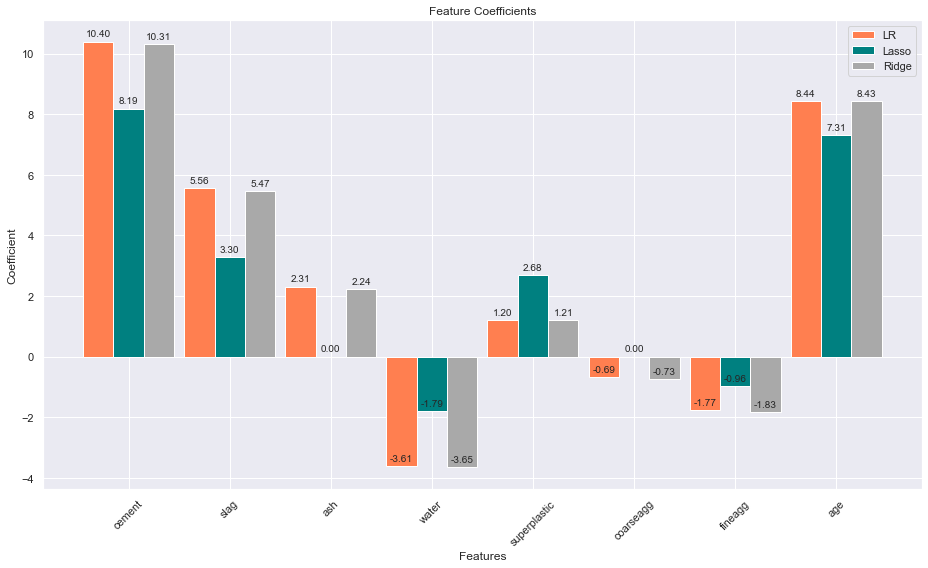

In [43]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

#df[:,df.columns.difference(column_names)]

column_names = list(concrete.columns)

labels = column_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(13,8))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR', color='coral')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso', color='teal')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge', color='darkgrey')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

*Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible. Also, Coefficients with Linear and Ridge are almost same.*

**Plotting Predictions**

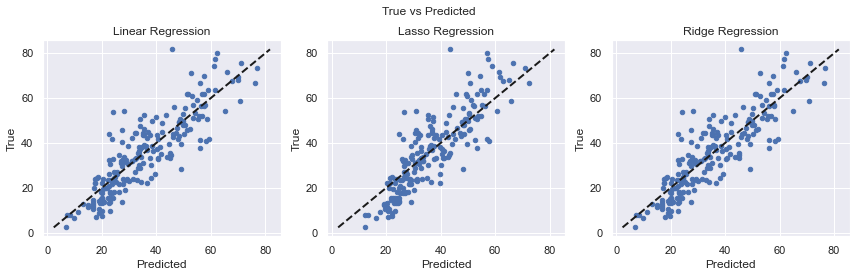

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

*Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is)*

#### Decision Trees

Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 6.51 		 42.40 		4.27 		0.86


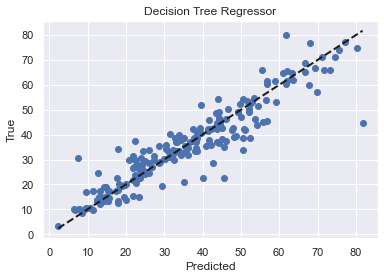

In [45]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

- The Root Mean Squared Error (RMSE) has come down from 8.60 to 6.63, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line.

#### Random Forest Regressor
Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.88 		 23.82 		3.31 		0.92


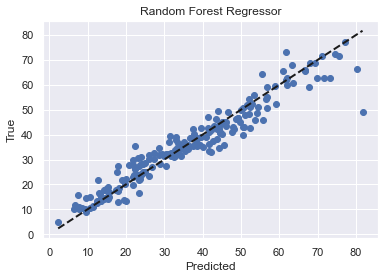

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

- The RMSE with Random Forest Regressor is now 4.97, we have reduced the error by ensembling multiple trees.

**Feature importances for Decision Tree and Random Forest**

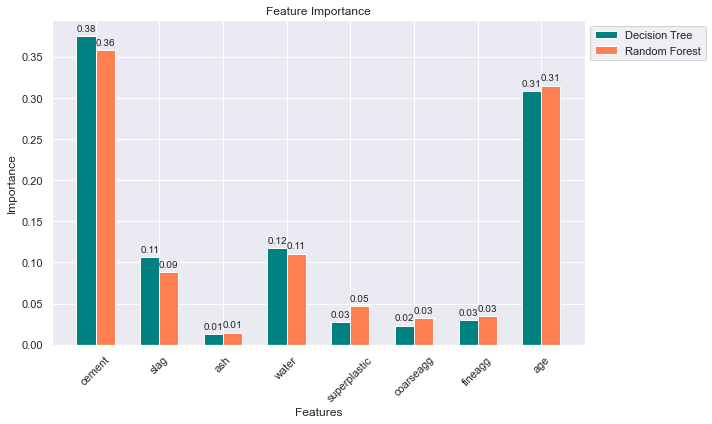

In [47]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

column_names = list(concrete.columns)

labels = column_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree', color='teal')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest', color='coral')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

*Cement and Age are treated as the most important features by tree based models. Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.*

### Comparision

Finally, lets compare the results of all the algorithms.

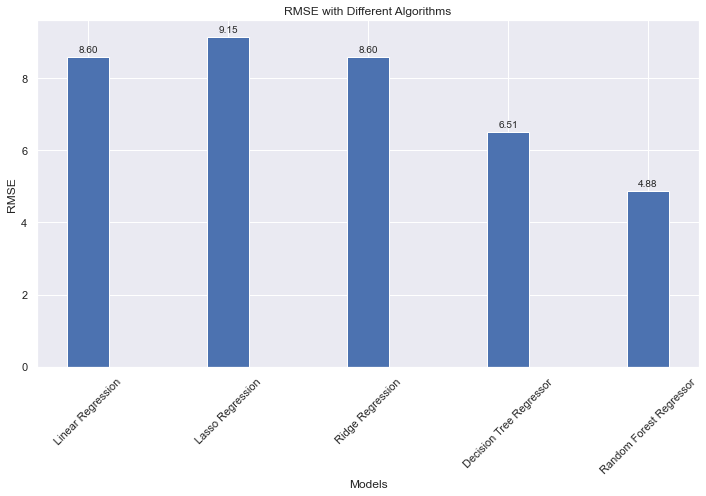

In [48]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

## Conclusion

#### Random Forest Regressor is the best choice for this problem.